<a href="https://colab.research.google.com/github/AbhinavShakunt/MY_Data_Science_Notebooks/blob/main/Data_Augmentation_To_Address_Overfitting_In_Flower_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 3s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/tulips/13539384593_23449f7332_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7166606598_5d2cd307c3.jpg'),
 PosixPath('datasets/flower_photos/tulips/5633266048_4f4bfb2cf1_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5631861819_f0eb39a357_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3011223301_09b4e3edb7.jpg'),
 PosixPath('datasets/flower_photos/tulips/14084211971_0f921f11fe_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2399982682_16929d1f6d_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4521496161_2b41d4182e.jpg'),
 PosixPath('datasets/flower_photos/tulips/8659691170_09db83d023.jpg'),
 PosixPath('datasets/flower_photos/tulips/8706523526_a0f161b72b.jpg'),
 PosixPath('datasets/flower_photos/tulips/15275199229_962387f24d.jpg'),
 PosixPath('datasets/flower_photos/tulips/13562271714_d534531374.jpg'),
 PosixPath('datasets/flower_photos/tulips/3516271083_fba63b5861.jpg'),
 PosixPath('datasets/flower_photos/tulips/5697471591_200ff951fa

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3948347096_42261f047a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/19823402005_2db025dd66_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg')]

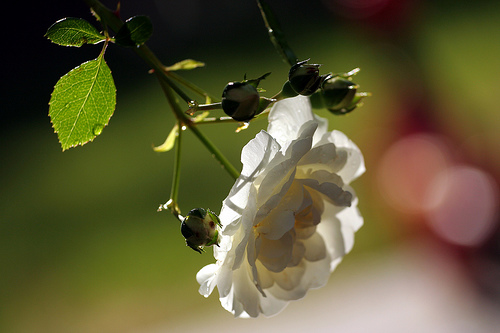

In [8]:
PIL.Image.open(str(roses[1]))

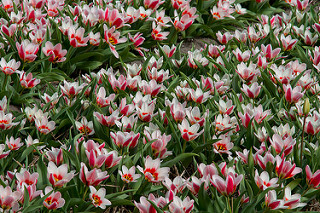

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3948347096_42261f047a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('datasets/flower_photos/roses/15822837396_96b392fda8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/19823402005_2db025dd66_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg')]

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(240, 163, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 7s 19ms/step - loss: 1.3221 - accuracy: 0.4360
Epoch 2/50
86/86 [==============================] - 2s 19ms/step - loss: 0.9804 - accuracy: 0.6119
Epoch 3/50
86/86 [==============================] - 2s 20ms/step - loss: 0.8191 - accuracy: 0.6893
Epoch 4/50
86/86 [==============================] - 2s 20ms/step - loss: 0.6478 - accuracy: 0.7584
Epoch 5/50
86/86 [==============================] - 2s 21ms/step - loss: 0.4383 - accuracy: 0.8419
Epoch 6/50
86/86 [==============================] - 2s 22ms/step - loss: 0.2561 - accuracy: 0.9121
Epoch 7/50
86/86 [==============================] - 2s 20ms/step - loss: 0.1707 - accuracy: 0.9448
Epoch 8/50
86/86 [==============================] - 2s 20ms/step - loss: 0.1011 - accuracy: 0.9698
Epoch 9/50
86/86 [==============================] - 2s 20ms/step - loss: 0.0614 - accuracy: 0.9840
Epoch 10/50
86/86 [==============================] - 2s 20ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 11/

In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 17ms/step - loss: 3.2749 - accuracy: 0.6013


[3.2748515605926514, 0.601307213306427]

In [22]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 12ms/step


array([[  3.6568487 ,  23.684082  ,   4.4278116 , -12.909949  ,
          0.9849389 ],
       [ 28.326454  , -19.031796  , -11.762153  , -18.168335  ,
         18.43557   ],
       [ -5.160818  ,   5.249562  ,  18.213917  , -13.354518  ,
         -1.9373884 ],
       ...,
       [  7.506751  ,  -8.1040945 ,  -1.7632123 ,   9.404275  ,
          6.015749  ],
       [ 13.265151  ,  -4.0377984 ,  -3.9000013 , -13.264733  ,
         11.846888  ],
       [ -9.329936  ,   0.4020158 ,   6.3787456 ,  11.203649  ,
          0.33315462]], dtype=float32)

In [23]:
score = tf.nn.softmax(predictions[0])

In [24]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.0057793e-09, 1.0000000e+00, 4.3361830e-09, 1.2806007e-16,
       1.3863972e-10], dtype=float32)>

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

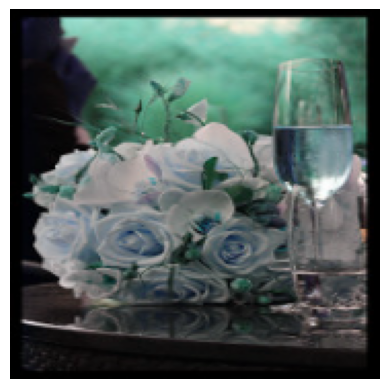

In [26]:
plt.axis('off')
plt.imshow(X[0])


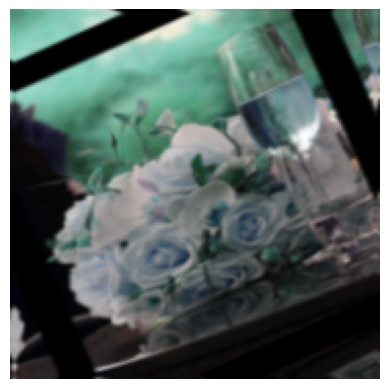

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

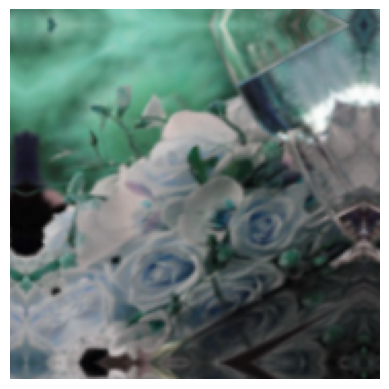

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 5s 28ms/step - loss: 1.2549 - accuracy: 0.4459
Epoch 2/50
86/86 [==============================] - 2s 28ms/step - loss: 1.0454 - accuracy: 0.5865
Epoch 3/50
86/86 [==============================] - 2s 28ms/step - loss: 0.9461 - accuracy: 0.6395
Epoch 4/50
86/86 [==============================] - 2s 27ms/step - loss: 0.8762 - accuracy: 0.6562
Epoch 5/50
86/86 [==============================] - 2s 27ms/step - loss: 0.8373 - accuracy: 0.6741
Epoch 6/50
86/86 [==============================] - 2s 27ms/step - loss: 0.7990 - accuracy: 0.6879
Epoch 7/50
86/86 [==============================] - 2s 27ms/step - loss: 0.7568 - accuracy: 0.7075
Epoch 8/50
86/86 [==============================] - 2s 28ms/step - loss: 0.7002 - accuracy: 0.7267
Epoch 9/50
86/86 [==============================] - 2s 27ms/step - loss: 0.6688 - accuracy: 0.7500
Epoch 10/50
86/86 [==============================] - 2s 27ms/step - loss: 0.6406 - accuracy: 0.7467
Epoch 11/

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 11ms/step - loss: 1.1617 - accuracy: 0.7298


[1.161712408065796, 0.7298474907875061]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74% previously it was 60.13%